# Laplace Approximation on different distributions

In [1]:
# Importing libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.distributions import Normal, MultivariateNormal, Beta, Bernoulli
from ipywidgets import interact, FloatSlider, IntSlider
np.random.seed(0)
torch.manual_seed(0)

### Univariate Normal Distribution

In [2]:
# Initializing the true parameters for the true normal distribution
MU = 0
SIGMA = 2

# Initializing the distribution for the true normal distribution
true_dist = Normal(MU, SIGMA)

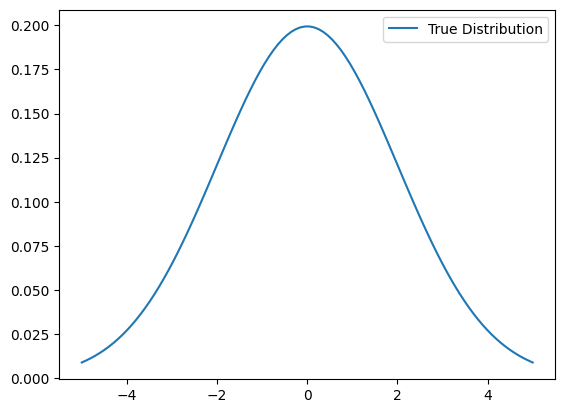

In [3]:
# Plotting the true distribution
x = np.linspace(-5, 5, 100)
plt.plot(x, true_dist.log_prob(torch.tensor(x)).exp().numpy(), label='True Distribution')
plt.legend()
plt.show()

In [4]:
# Creating a lambda function for the log likelihood function of the true distribution
log_likelihood = lambda x: true_dist.log_prob(x)

In [5]:
# Finding the mode of the true distribution using gradient descent
ITER = 5000
x = torch.tensor([0.0], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)
for i in range(ITER):
    optimizer.zero_grad()
    loss = -log_likelihood(x)
    loss.backward()
    optimizer.step()

# Mode of the true distribution
mu = x.detach().numpy()[0]
mu

0.0

In [6]:
# Finding the Hessian of the log of the true distribution at the mode using autograd Hessian function
x = torch.tensor(mu, requires_grad=True)
hessian = torch.autograd.functional.hessian(log_likelihood, x)
hessian

tensor(-0.2500)

In [7]:
# Taking the negative inverse of the hessian to find the variance
var = -1 / hessian
var

tensor(4.)

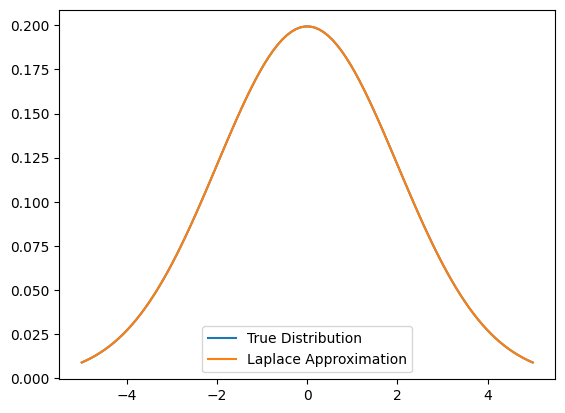

In [8]:
# Plotting a normal distribution based on the mode and variance calculated. We also plot the true distribution for comparison
x = torch.linspace(-5, 5, 100)
plt.plot(x, torch.exp(true_dist.log_prob(x)), label='True Distribution')
plt.plot(x, torch.exp(Normal(mu, torch.sqrt(var)).log_prob(x)), label='Laplace Approximation')
plt.legend()
plt.show()

### Interactive widget for Univariate Normal Laplace Approximation

In [9]:
# Function for the entire above process
def laplace_approximation_normal(mu_init, var_init, iter=ITER, lr=0.01):
    # Initializing the normal distribution to be used as the true distribution based on the given parameters
    true_dist = Normal(mu_init, torch.sqrt(var_init))

    # Creating a lambda function for the log likelihood function of the true distribution
    log_likelihood = lambda x: true_dist.log_prob(x)

    # Finding the mode of the true distribution using gradient descent
    x = torch.tensor([0.0], requires_grad=True)
    optimizer = torch.optim.SGD([x], lr=lr)
    for i in range(iter):
        optimizer.zero_grad()
        loss = -log_likelihood(x)
        loss.backward()
        optimizer.step()
    mu = x.detach().numpy()[0]
    # Finding the Hessian of the log of the true distribution at the mode using autograd Hessian function
    x = torch.tensor([mu], requires_grad=True)
    hessian = torch.autograd.functional.hessian(log_likelihood, x)
    # Taking the negative inverse of the hessian to find the variance
    var = -torch.inverse(hessian)
    return mu, var

In [10]:
# Creating a widget to visualize the effect of mu and var on the laplace approximation
def plot_laplace(mu_init, var_init):
    mu, var = laplace_approximation_normal(torch.tensor(mu_init), torch.tensor(var_init), iter=ITER, lr=0.01)
    plt.plot(x, Normal(mu_init, np.sqrt(var_init)).log_prob(x).exp(), label='True Distribution')
    plt.plot(x, Normal(mu, torch.sqrt(var)).log_prob(x).exp().squeeze(), label='Laplace Approximation')
    plt.legend()
    plt.show()

interact(plot_laplace, mu_init=FloatSlider(min=-5, max=5, step=0.1, value=mu), var_init=FloatSlider(min=0.1, max=10, step=0.1, value=var))

interactive(children=(FloatSlider(value=0.0, description='mu_init', max=5.0, min=-5.0), FloatSlider(value=4.0,…

<function __main__.plot_laplace(mu_init, var_init)>

### Bivariate Spherical Normal Distribution

In [11]:
# Initializing the true parameters for the true bivariate normal distribution with zero covariance
MU = torch.tensor([0.0, 0.0])
SIGMA = torch.tensor([[2.0, 0.0], [0.0, 2.0]])

# Initializing the distribution for the true bivariate normal distribution with zero covariance
true_dist = MultivariateNormal(MU, SIGMA)

In [12]:
# Creating a lambda function for the log likelihood function of the true distribution
log_likelihood = lambda x: true_dist.log_prob(x)

C:\Users\nokze\AppData\Roaming\Python\Python310\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


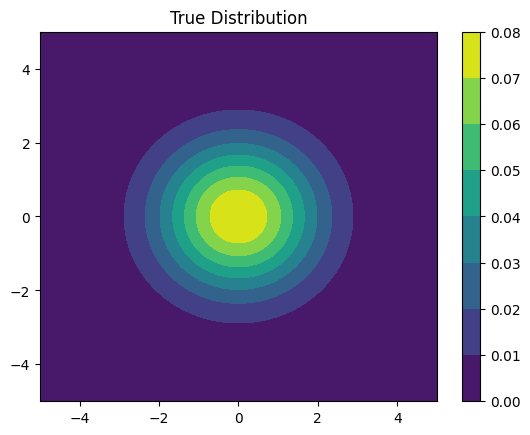

In [13]:
# Plotting the true distribution
x = torch.linspace(-5, 5, 100)
y = torch.linspace(-5, 5, 100)
X, Y = torch.meshgrid(x, y)
Z = torch.stack([X, Y], dim=-1)
plt.contourf(X, Y, torch.exp(true_dist.log_prob(Z)))
plt.colorbar()
plt.title('True Distribution')
plt.show()

In [14]:
# Finding the mode of the true distribution using gradient descent
ITER = 5000
x = torch.tensor([0.2, 0.1], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)
for i in range(ITER):
    optimizer.zero_grad()
    loss = -log_likelihood(x)
    loss.backward()
    optimizer.step()

# Mode of the true distribution
mu = x.detach().numpy()
mu

array([2.6087563e-12, 1.3043782e-12], dtype=float32)

In [15]:
# Finding the Hessian of the log of the true distribution at the mode using autograd Hessian function
x = torch.tensor(mu, requires_grad=True)
hessian = torch.autograd.functional.hessian(log_likelihood, x)
hessian

tensor([[-0.5000, -0.0000],
        [ 0.0000, -0.5000]])

In [16]:
# Taking the negative inverse of the hessian to find the variance
var = -torch.inverse(hessian)
var

tensor([[2., -0.],
        [0., 2.]])

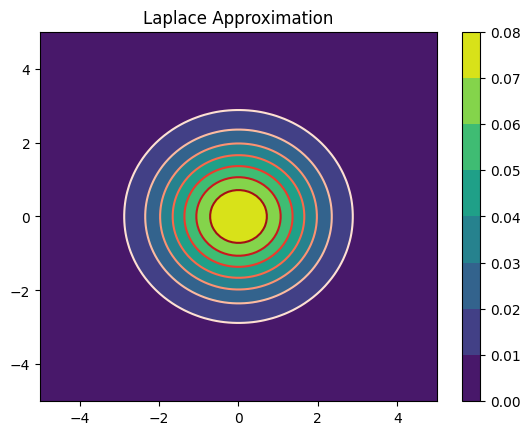

In [17]:
# Plotting a bivariate normal distribution based on the mode and variance calculated. We also plot the true distribution for comparison
x = torch.linspace(-5, 5, 100)
y = torch.linspace(-5, 5, 100)
X, Y = torch.meshgrid(x, y)
Z = torch.stack([X, Y], dim=-1)
plt.contourf(X, Y, torch.exp(true_dist.log_prob(Z)))
plt.colorbar()
plt.contour(X, Y, torch.exp(MultivariateNormal(torch.tensor(mu), var).log_prob(Z)), cmap='Reds')
plt.title('Laplace Approximation')
plt.show()

### Bivariate Diagonal Normal Distribution

In [57]:
# Initializing the true parameters for the true bivariate normal distribution with zero covariance
MU = torch.tensor([0.0, 0.0])
VAR = torch.tensor([[2.0, 0.3], [0.3, 2.0]])

# Initializing the distribution for the true bivariate normal distribution with zero covariance
true_dist = MultivariateNormal(MU, VAR)

In [58]:
# Creating a lambda function for the log likelihood function of the true distribution
log_likelihood = lambda x: true_dist.log_prob(x)

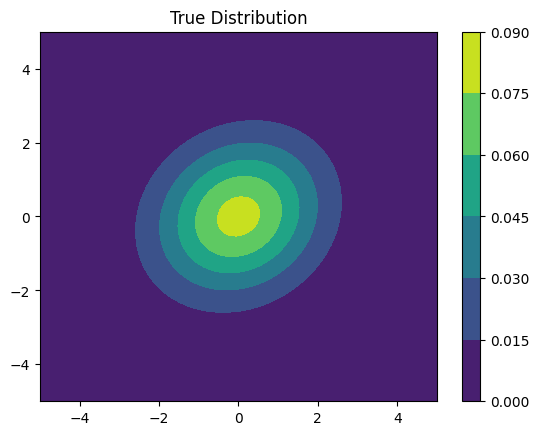

In [59]:
# Plotting the true distribution
x = torch.linspace(-5, 5, 100)
y = torch.linspace(-5, 5, 100)
X, Y = torch.meshgrid(x, y)
Z = torch.stack([X, Y], dim=-1)
plt.contourf(X, Y, torch.exp(true_dist.log_prob(Z)))
plt.colorbar()
plt.title('True Distribution')
plt.show()

In [60]:
# Finding the mode of the true distribution using gradient descent
ITER = 5000
x = torch.tensor([0.0, 0.0], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)
for i in range(ITER):
    optimizer.zero_grad()
    loss = -log_likelihood(x)
    loss.backward()
    optimizer.step()

# Mode of the true distribution
mu = x.detach().numpy()
mu

array([0., 0.], dtype=float32)

In [61]:
# Finding the Hessian of the log of the true distribution at the mode using autograd Hessian function
x = torch.tensor(mu, requires_grad=True)
hessian = torch.autograd.functional.hessian(log_likelihood, x)
hessian

tensor([[-0.5115,  0.0767],
        [ 0.0767, -0.5115]])

In [62]:
# Taking the negative inverse of the hessian to find the variance
var = -torch.inverse(hessian)
var

tensor([[2.0000, 0.3000],
        [0.3000, 2.0000]])

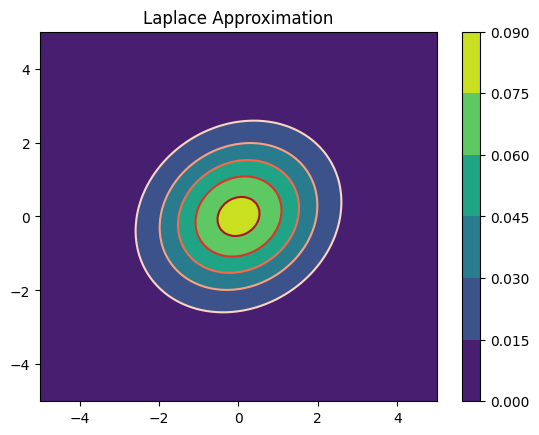

In [63]:
# Plotting a bivariate normal distribution based on the mode and variance calculated. We also plot the true distribution for comparison
x = torch.linspace(-5, 5, 100)
y = torch.linspace(-5, 5, 100)
X, Y = torch.meshgrid(x, y)
Z = torch.stack([X, Y], dim=-1)
plt.contourf(X, Y, torch.exp(true_dist.log_prob(Z)))
plt.colorbar()
plt.contour(X, Y, torch.exp(MultivariateNormal(torch.tensor(mu), var).log_prob(Z)), cmap='Reds')
plt.title('Laplace Approximation')
plt.show()

### Interactive widget for Bivariate Normal Laplace Approximation

In [64]:
# Function for the entire above process
def laplace_approximation_bivariate_normal(mu_init, var_init, iter=ITER, lr=0.01):
    # Initializing the bivariate normal distribution to be used as the true distribution based on the given parameters
    true_dist = MultivariateNormal(mu_init, var_init)

    # Creating a lambda function for the log likelihood function of the true distribution
    log_likelihood = lambda x: true_dist.log_prob(x)

    # Finding the mode of the true distribution using gradient descent
    x = torch.tensor([0.0, 0.0], requires_grad=True)
    optimizer = torch.optim.SGD([x], lr=lr)
    for i in range(iter):
        optimizer.zero_grad()
        loss = -log_likelihood(x)
        loss.backward()
        optimizer.step()
    mu = x.detach().numpy()
    # Finding the Hessian of the log of the true distribution at the mode using autograd Hessian function
    x = torch.tensor(mu, requires_grad=True)
    hessian = torch.autograd.functional.hessian(log_likelihood, x)
    # Taking the negative inverse of the hessian to find the variance
    var = -torch.inverse(hessian)
    return mu, var

In [65]:
# Creating a widget to visualize the effect of mu and var on the laplace approximation
def plot_laplace(mu_init_x, mu_init_y, var_x, var_y, var_xy):
    var_init = torch.tensor([[var_x, var_xy], [var_xy, var_y]])
    mu, var = laplace_approximation_bivariate_normal(torch.tensor([mu_init_x, mu_init_y]), var_init, iter=ITER, lr=0.01)
    plt.contourf(X, Y, torch.exp(MultivariateNormal(torch.tensor([mu_init_x, mu_init_y]), var_init).log_prob(Z)))
    plt.colorbar()
    plt.contour(X, Y, torch.exp(MultivariateNormal(torch.tensor(mu), var).log_prob(Z)), cmap='Reds')
    plt.title('Laplace Approximation')
    plt.show()

interact(plot_laplace, mu_init_x=FloatSlider(min=-5, max=5, step=0.1, value=mu[0]), mu_init_y=FloatSlider(min=-5, max=5, step=0.1, value=mu[1]), var_x=FloatSlider(min=0.0, max=10, step=0.1, value=var[0, 0]), var_y=FloatSlider(min=0.0, max=5, step=0.1, value=var[1, 1]), var_xy=FloatSlider(min=-2.4, max=2.4, step=0.1, value=var[0, 1]))

interactive(children=(FloatSlider(value=0.0, description='mu_init_x', max=5.0, min=-5.0), FloatSlider(value=0.…

<function __main__.plot_laplace(mu_init_x, mu_init_y, var_x, var_y, var_xy)>

### Beta Distribution

In [38]:
# Initializing the true parameters for the true beta distribution
ALPHA = 2
BETA = 4

# Initializing the distribution for the true beta distribution
true_dist = Beta(ALPHA, BETA)

In [39]:
# Creating a lambda function for the log likelihood function of the true distribution
log_likelihood = lambda x: true_dist.log_prob(x)

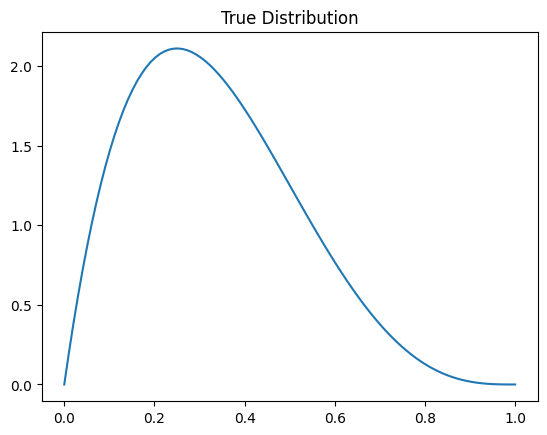

In [40]:
# Plotting the true distribution
x = torch.linspace(0, 1, 100)
plt.plot(x, true_dist.log_prob(x).exp())
plt.title('True Distribution')
plt.show()

In [41]:
# Finding the mode of the true distribution using gradient descent
ITER = 5000
x = torch.tensor([0.1], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)
for i in range(ITER):
    optimizer.zero_grad()
    loss = -log_likelihood(x)
    loss.backward()
    optimizer.step()

# Mode of the true distribution
mu = x.detach().numpy()[0]
mu

0.24999997

In [42]:
# Finding the Hessian of the log of the true distribution at the mode using autograd Hessian function
x = torch.tensor(mu, requires_grad=True)
hessian = torch.autograd.functional.hessian(log_likelihood, x)
hessian

tensor(-21.3333)

In [43]:
# Taking the negative inverse of the hessian to find the variance
var = -1 / hessian
var

tensor(0.0469)

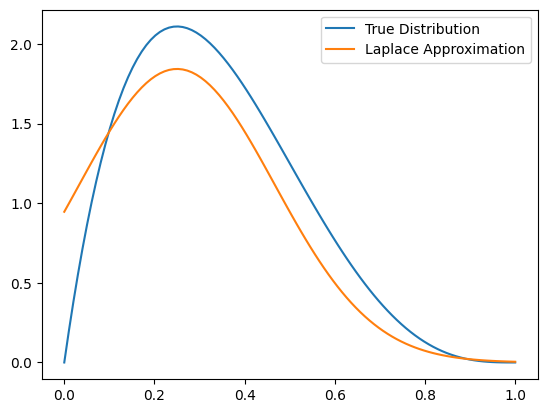

In [44]:
# Plotting a normal distribution based on the mode and variance calculated. We also plot the true distribution for comparison
x = torch.linspace(0, 1, 100)
plt.plot(x, true_dist.log_prob(x).exp(), label='True Distribution')
plt.plot(x, Normal(mu, torch.sqrt(var)).log_prob(x).exp(), label='Laplace Approximation')
plt.legend()
plt.show()

In [45]:
# Function for the entire above process
def laplace_approximation_beta(alpha_init, beta_init, iter=ITER, lr=0.001):
    # Initializing the beta distribution to be used as the true distribution based on the given parameters
    true_dist = Beta(alpha_init, beta_init)

    # Creating a lambda function for the log likelihood function of the true distribution
    log_likelihood = lambda x: true_dist.log_prob(x).sum()

    # Finding the mode of the true distribution using gradient descent
    x = torch.tensor([0.02], requires_grad=True)
    optimizer = torch.optim.SGD([x], lr=lr)
    for i in range(iter):
        optimizer.zero_grad()
        loss = -log_likelihood(x)
        loss.backward()
        optimizer.step()
    mu = x.detach().numpy()[0]
    # Finding the Hessian of the log of the true distribution at the mode using autograd Hessian function
    x = torch.tensor(mu, requires_grad=True)
    hessian = torch.autograd.functional.hessian(log_likelihood, x)
    # Taking the negative inverse of the hessian to find the variance
    var = -1 / hessian
    return mu, var

In [46]:
# Creating a widget to visualize the effect of alpha and beta on the laplace approximation
def plot_laplace(alpha_init, beta_init):
    mu, var = laplace_approximation_beta(torch.tensor(alpha_init), torch.tensor(beta_init), iter=ITER, lr=0.001)
    plt.plot(x, Beta(alpha_init, beta_init).log_prob(x).exp(), label='True Distribution')
    plt.plot(x, Normal(mu, torch.sqrt(var)).log_prob(x).exp().squeeze(), label='Laplace Approximation')
    plt.legend()
    plt.show()

interact(plot_laplace, alpha_init=FloatSlider(min=0.0, max=10, step=0.1, value=ALPHA), beta_init=FloatSlider(min=0.0, max=10, step=0.1, value=BETA))

interactive(children=(FloatSlider(value=2.0, description='alpha_init', max=10.0), FloatSlider(value=4.0, descr…

<function __main__.plot_laplace(alpha_init, beta_init)>

### Joint Probability of a Beta and Bernoulli Distribution

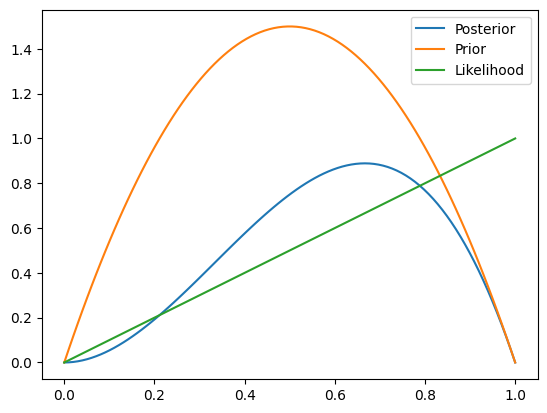

In [47]:
# Initializing the true parameters for the true beta prior distribution
ALPHA = 2
BETA = 2

# Initializing the distribution for the true beta prior distribution
prior = Beta(ALPHA, BETA)

# Creating the posterior distribution
ll_posterior = lambda x: Bernoulli(x).log_prob(torch.tensor(1.0)) + prior.log_prob(x)

# Plotting the posterior distribution, prior and likelihood
x = torch.linspace(0, 1, 100)
plt.plot(x, torch.exp(ll_posterior(x)))
plt.plot(x, torch.exp(prior.log_prob(x)))
plt.plot(x, torch.exp(Bernoulli(x).log_prob(torch.tensor(1.0))))
plt.legend(['Posterior', 'Prior', 'Likelihood'])
plt.show()

In [48]:
# Finding the mode of the posterior distribution using gradient descent
ITER = 5000
x = torch.tensor([0.1], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)
for i in range(ITER):
    optimizer.zero_grad()
    loss = -ll_posterior(x)
    loss.backward()
    optimizer.step()

# Mode of the posterior distribution
mu = x.detach().numpy()[0]
mu  

0.66666645

In [49]:
# Finding the Hessian of the log of the posterior distribution at the mode using autograd Hessian function
x = torch.tensor(mu, requires_grad=True)
hessian = torch.autograd.functional.hessian(ll_posterior, x)
hessian

tensor(-13.5000)

In [50]:
# Taking the negative inverse of the hessian to find the variance
var = -1 / hessian
var

tensor(0.0741)

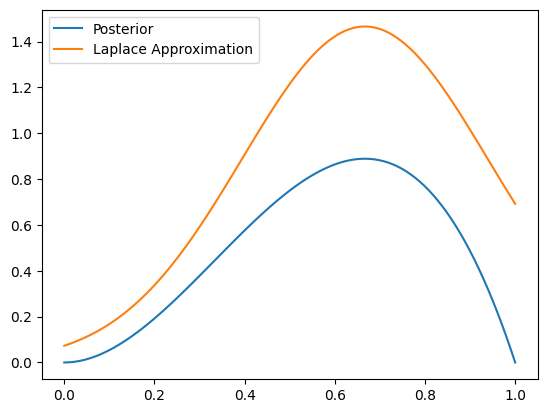

In [51]:
# Plotting a normal distribution based on the mode and variance calculated. We also plot the true distribution for comparison
x = torch.linspace(0, 1, 100)
plt.plot(x, torch.exp(ll_posterior(x)), label='Posterior')
plt.plot(x, Normal(mu, torch.sqrt(var)).log_prob(x).exp(), label='Laplace Approximation')
plt.legend()
plt.show()

In [52]:
# Calculate the area under the curve of the posterior distribution
x = torch.linspace(0, 1, 10000)
area = torch.exp(ll_posterior(x)).sum() / 10000
area

tensor(0.4999)

In [53]:
# Function for the entire above process
def laplace_approximation_posterior(prior, iter=ITER, lr=0.001):
    # Creating the posterior distribution
    ll_posterior = lambda x: Bernoulli(x).log_prob(torch.tensor(1.0)) + prior.log_prob(x)

    # Finding the mode of the posterior distribution using gradient descent
    x = torch.tensor([0.1], requires_grad=True)
    optimizer = torch.optim.SGD([x], lr=lr)
    for i in range(iter):
        optimizer.zero_grad()
        loss = -ll_posterior(x)
        loss.backward()
        optimizer.step()
    mu = x.detach().numpy()[0]
    # Finding the Hessian of the log of the posterior distribution at the mode using autograd Hessian function
    x = torch.tensor(mu, requires_grad=True)
    hessian = torch.autograd.functional.hessian(ll_posterior, x)
    # Taking the negative inverse of the hessian to find the variance
    var = -1 / hessian
    return mu, var

In [54]:
# Creating a widget to visualize the effect of alpha and beta on the laplace approximation
def plot_laplace(alpha_init, beta_init):
    # Defining the posterior distribution
    ll_posterior = lambda x: Bernoulli(x).log_prob(torch.tensor(1.0)) + Beta(alpha_init, beta_init).log_prob(x)

    prior = Beta(alpha_init, beta_init)
    mu, var = laplace_approximation_posterior(prior, iter=ITER, lr=0.001)
    plt.plot(x, torch.exp(ll_posterior(x)), label='Posterior')
    plt.plot(x, Normal(mu, torch.sqrt(var)).log_prob(x).exp().squeeze(), label='Laplace Approximation')
    plt.plot(x, torch.exp(Bernoulli(x).log_prob(torch.tensor(1.0))))
    plt.legend()
    plt.show()

interact(plot_laplace, alpha_init=FloatSlider(min=0.0, max=10, step=0.1, value=ALPHA), beta_init=FloatSlider(min=0.0, max=10, step=0.1, value=BETA))

interactive(children=(FloatSlider(value=2.0, description='alpha_init', max=10.0), FloatSlider(value=2.0, descr…

<function __main__.plot_laplace(alpha_init, beta_init)>